In [1]:
import pandas as pd
import numpy as np 
import xgboost as xgb

In [2]:
train = pd.read_csv("traindata_rfe.csv")
test = pd.read_csv("testdata_rfe.csv")

/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_84450/2738918831.py:1: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("traindata_rfe.csv")


In [3]:
X_train = train.drop(['transcript_id', 'gene_id', 'label'], axis=1)
y_train = train['label']
X_test = test.drop(['transcript_id', 'gene_id', 'label'], axis=1)
y_test = test['label']

In [4]:
y_train.value_counts()

label
0    93715
1    93715
Name: count, dtype: int64

In [33]:
y_test.value_counts()

label
0    22648
1     1184
Name: count, dtype: int64

In [5]:
X_train.head()

,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
0,244,125.913514,4.386989,6.650,126.0,3.440,1.843025,4.944365,3.302671,2.765244,2.906225,2.522168,1,4,16
1,261,107.889535,3.016599,3.000,108.0,2.660,1.689167,2.981182,1.237045,3.526528,1.466295,2.492530,6,2,10
2,316,98.947027,2.087146,3.780,99.5,1.910,1.311103,1.492577,0.893481,3.203816,0.800496,1.484341,12,0,2
3,332,97.836500,2.236520,2.635,97.5,2.135,2.459317,3.202963,1.393868,1.928009,0.741771,3.494937,2,6,3
4,368,121.954545,4.260253,5.660,122.0,4.160,2.743228,2.664643,1.753894,2.177236,1.341822,2.379045,3,9,12


In [6]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(X_train)
normalised_X_train = pd.DataFrame(d, columns=X_train.columns)
normalised_X_train.head()


,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
0,0.012869,0.774042,0.287885,0.463500,0.781312,0.201650,0.048485,0.280016,0.101848,0.226398,0.090561,0.146461,0.043478,0.235294,0.695652
1,0.013777,0.410623,0.157972,0.142480,0.423459,0.130156,0.043891,0.152029,0.033255,0.310842,0.042812,0.144293,0.260870,0.117647,0.434783
2,0.016714,0.230314,0.069860,0.211082,0.254473,0.061412,0.032605,0.054982,0.021846,0.275046,0.020733,0.070529,0.521739,0.000000,0.086957
3,0.017568,0.207922,0.084021,0.110378,0.214712,0.082035,0.066883,0.166488,0.038463,0.133529,0.018786,0.217634,0.086957,0.352941,0.130435
4,0.019491,0.694217,0.275871,0.376429,0.701789,0.267644,0.075359,0.131393,0.050418,0.161175,0.038684,0.135990,0.130435,0.529412,0.521739


In [36]:
normalised_X_train.describe()

,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
count,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000
mean,0.085326,0.508940,0.154020,0.305686,0.520414,0.132076,0.041002,0.174722,0.057859,0.295164,0.037428,0.147859,0.483273,0.496438,0.596488
std,0.072670,0.228647,0.075383,0.165956,0.227870,0.064208,0.020944,0.084652,0.027575,0.103189,0.021194,0.049804,0.313065,0.264055,0.294130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.039141,0.261410,0.097079,0.163588,0.273051,0.085876,0.026905,0.116227,0.035821,0.219571,0.020538,0.112853,0.130435,0.294118,0.391304
50%,0.068938,0.595979,0.145802,0.284984,0.604371,0.122314,0.039776,0.157656,0.060753,0.291887,0.035751,0.143676,0.521739,0.529412,0.608696
75%,0.108453,0.682189,0.197189,0.415128,0.697689,0.165445,0.053684,0.218044,0.076794,0.365810,0.049810,0.177976,0.739130,0.647059,0.869565
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Initialize the XGBoost model
model = xgb.XGBClassifier()

# Train the model on the training data
model.fit(normalised_X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [7]:
d = scaler.fit_transform(X_test)
normalised_X_test = pd.DataFrame(d, columns=X_test.columns)
normalised_X_test.head()

,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
0,0.054772,0.689752,0.111903,0.727019,0.693878,0.107848,0.189319,0.254995,0.077564,0.365202,0.032594,0.026947,0.478261,1.000000,0.913043
1,0.058768,0.791245,0.128262,0.324048,0.795918,0.100253,0.087639,0.142416,0.062153,0.252199,0.044891,0.043219,0.130435,0.647059,0.869565
2,0.061236,0.778200,0.168967,0.438254,0.795918,0.157468,0.058464,0.219995,0.096518,0.290691,0.052945,0.067706,0.304348,0.176471,0.608696
3,0.070052,0.721716,0.187557,0.418756,0.714286,0.172658,0.144078,0.161922,0.131265,0.392006,0.053597,0.064235,0.130435,0.647059,0.869565
4,0.081335,0.708707,0.173422,0.592386,0.714286,0.151392,0.110263,0.233199,0.114632,0.424743,0.056727,0.021868,0.478261,1.000000,1.000000


In [12]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(normalised_X_test)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     22648
           1       0.40      0.31      0.35      1184

    accuracy                           0.94     23832
   macro avg       0.68      0.64      0.66     23832
weighted avg       0.94      0.94      0.94     23832



In [20]:
model.predict_proba(normalised_X_test)

array([[0.7701959 , 0.2298041 ],
       [0.88085675, 0.11914323],
       [0.98157007, 0.01842996],
       ...,
       [0.97298884, 0.02701113],
       [0.8707935 , 0.1292065 ],
       [0.9935853 , 0.0064147 ]], dtype=float32)

In [14]:
model.predict(normalised_X_test).ravel() 

array([0, 0, 0, ..., 0, 0, 0])

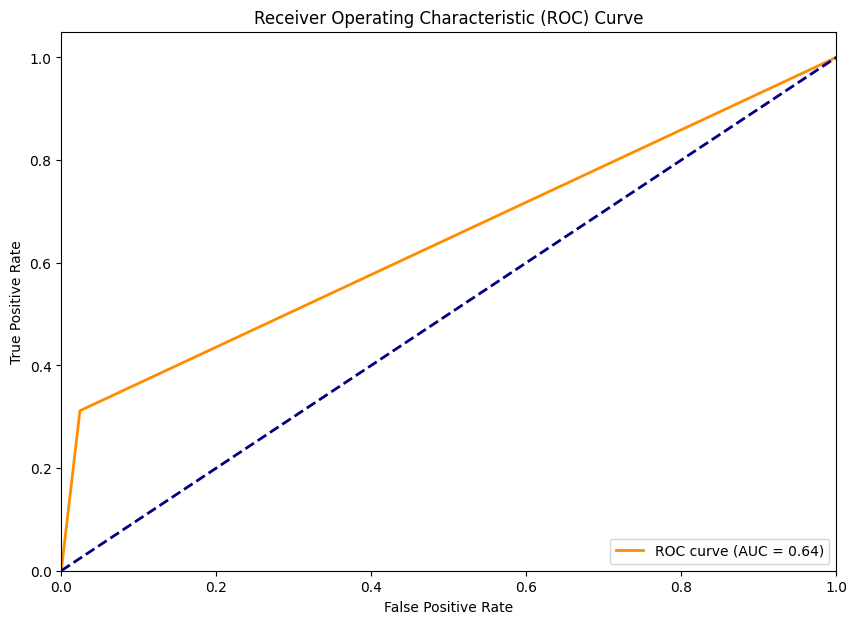

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(normalised_X_test).ravel()  # Get predicted probabilities

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Hyperparameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = xgb.XGBClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 2, 3],
}


In [45]:
model = xgb.XGBClassifier()
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, scoring='roc_auc', cv=5)
random_search.fit(normalised_X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 2, 3],
                                        'n_estimators': [100, 200, 300]},
                   scoring='roc_auc')

In [46]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_


In [47]:
best_params

{'n_estimators': 300,
 'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.2}

In [48]:
best_model.fit(normalised_X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
y_pred = best_model.predict(normalised_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     22648
           1       0.42      0.36      0.39      1184

    accuracy                           0.94     23832
   macro avg       0.69      0.67      0.68     23832
weighted avg       0.94      0.94      0.94     23832



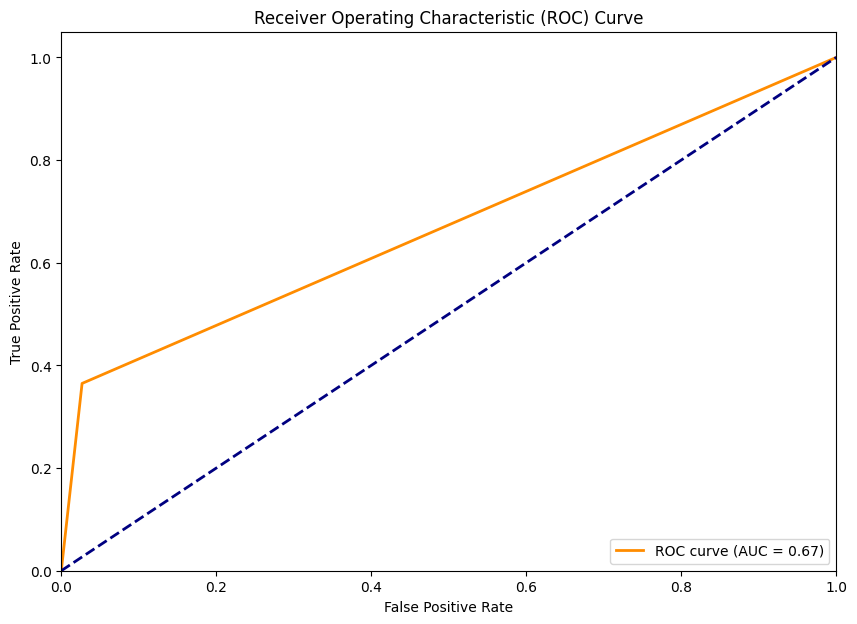

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred = best_model.predict(normalised_X_test).ravel()  # Get predicted probabilities

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
# output probabiliy 
best_model.predict_proba(normalised_X_test)

array([[0.8069541 , 0.1930459 ],
       [0.9130698 , 0.08693022],
       [0.99670964, 0.00329036],
       ...,
       [0.9671266 , 0.03287337],
       [0.8982086 , 0.10179139],
       [0.99869114, 0.00130886]], dtype=float32)

### Innovation: Bayesian Optimisation with Hyperopt
source: https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning

In [ ]:
!pip3 install hyperopt

In [41]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        #'objective': ['binary:logistic', 'reg:logistic', 'reg:squarederror'],
        'objective':'reg:logistic',
        'seed': 0
    }

In [8]:
from sklearn.metrics import accuracy_score

In [42]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], objective =space['objective'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( normalised_X_train, y_train), ( normalised_X_test, y_test)]
    
    clf.fit(normalised_X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    y_pred = clf.predict(normalised_X_test)
    accuracy = accuracy_score(y_test, y_pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }


In [51]:
from sklearn.metrics import roc_auc_score, average_precision_score
import numpy as np
from hyperopt import STATUS_OK

def objective(space):
    clf = xgb.XGBClassifier(
        n_estimators=space['n_estimators'], 
        objective=space['objective'], 
        max_depth=int(space['max_depth']), 
        gamma=space['gamma'],
        reg_alpha=int(space['reg_alpha']),
        min_child_weight=int(space['min_child_weight']),
        colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(normalised_X_train, y_train), (normalised_X_test, y_test)]
    
    clf.fit(
        normalised_X_train, y_train,
        eval_set=evaluation, 
        eval_metric=["auc", "logloss"],  # Evaluate on both ROC AUC and log loss (which corresponds to negative PR AUC)
        early_stopping_rounds=10, verbose=False)
    
    y_pred_proba = clf.predict_proba(normalised_X_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    pr_auc = average_precision_score(y_test, y_pred_proba[:, 1])
    
    # You can customize the combination of these metrics based on your preferences.
    # For instance, you can assign weights to each metric.
    combined_metric = alpha * roc_auc + beta * pr_auc
    
    print("ROC AUC:", roc_auc)
    print("PR AUC:", pr_auc)
    print("Combined Metric:", combined_metric)
    
    return {'loss': -combined_metric, 'status': STATUS_OK }

# Set alpha and beta based on your preferences for the trade-off between ROC AUC and PR AUC.
alpha = 0.5
beta = 0.5

# Then, you can run your hyperparameter optimization using this objective function.


In [52]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore") 
    
    trials = Trials()

    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

ROC AUC:                                               
0.8153714836403428                                     
PR AUC:                                                
0.24153137772267239                                    
Combined Metric:                                       
0.5284514306815076                                     
ROC AUC:                                                                          
0.8231609183914574                                                                
PR AUC:                                                                           
0.2623769711424784                                                                
Combined Metric:                                                                  
0.5427689447669679                                                                
ROC AUC:                                                                          
0.8210644420305593                                                                


In [53]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9767855720519678, 'gamma': 8.389158481429057, 'max_depth': 17.0, 'min_child_weight': 10.0, 'reg_alpha': 167.0, 'reg_lambda': 0.5872508586775536}


In [54]:
best_model = xgb.XGBClassifier(colsample_bytree = 0.9767855720519678, gamma= 8.389158481429057, max_depth= 17, 
min_child_weight = 10, reg_alpha = 167, reg_lambda = 0.5872508586775536, n_estimators=180, objective='reg:logistic')
best_model.fit(normalised_X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9767855720519678, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=8.389158481429057,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, objective='reg:logistic', ...)

In [44]:
# version 6: reg:logistic 
best_model = xgb.XGBClassifier(colsample_bytree = 0.7445107941187324, gamma= 7.422940033575507, max_depth= 8, 
min_child_weight = 5, reg_alpha = 137, reg_lambda = 0.63311680578766,n_estimators=180, objective='reg:logistic')
best_model.fit(normalised_X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7445107941187324, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=7.422940033575507,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, objective='reg:logistic', ...)

In [74]:
# version 1, default objective (is what??)
best_model = xgb.XGBClassifier(colsample_bytree = 0.9106517200220865, gamma= 7.968124405035305, max_depth= 8, 
min_child_weight = 7, reg_alpha = 95, reg_lambda = 0.2576753118051971,n_estimators=180)
best_model.fit(normalised_X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9106517200220865, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=7.968124405035305,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [90]:
# version 2: binary:logistic (not much difference)
best_model = xgb.XGBClassifier(colsample_bytree = 0.5366955511357538, gamma= 8.436738873404938, max_depth= 8, 
min_child_weight = 1, reg_alpha = 87, reg_lambda = 0.6060111839730383,n_estimators=180, objective='binary:logistic')
best_model.fit(normalised_X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5366955511357538, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=8.436738873404938,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
# version 3: binary: hinge (not suitable cuz only output 0 and 1 )
best_model = xgb.XGBClassifier(colsample_bytree = 0.8679496948793609, gamma= 7.152835577951921, max_depth= 6, 
min_child_weight = 3, reg_alpha =108, reg_lambda = 0.9986466463946473,n_estimators=180, objective='binary:hinge',eval_metric='auc')
best_model.fit(normalised_X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8679496948793609, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=7.152835577951921,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, objective='binary:hinge', ...)

In [21]:
# version 4: binary:logisticraw (not suitable cuz output is not within 0 and 1)
best_model = xgb.XGBClassifier(colsample_bytree = 0.7211929943276688, gamma= 4.556487118479302, max_depth= 8, 
min_child_weight = 1, reg_alpha = 83, reg_lambda = 0.9962983854471751,n_estimators=180,objective='binary:logitraw',eval_metric='auc')
best_model.fit(normalised_X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7211929943276688, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=4.556487118479302,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, objective='binary:logitraw', ...)

In [ ]:
# version 5: reg:squarederror
best_model = xgb.XGBClassifier(colsample_bytree = 0.573124157314526, gamma= 5.141572645852733, max_depth= 7, 
min_child_weight = 5, reg_alpha = 135, reg_lambda = 0.6477880558789435,n_estimators=180,objective='reg:squarederror',eval_metric='auc')
best_model.fit(normalised_X_train,y_train)

In [55]:
y_pred = best_model.predict(normalised_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     22648
           1       0.43      0.45      0.44      1184

    accuracy                           0.94     23832
   macro avg       0.70      0.71      0.70     23832
weighted avg       0.94      0.94      0.94     23832



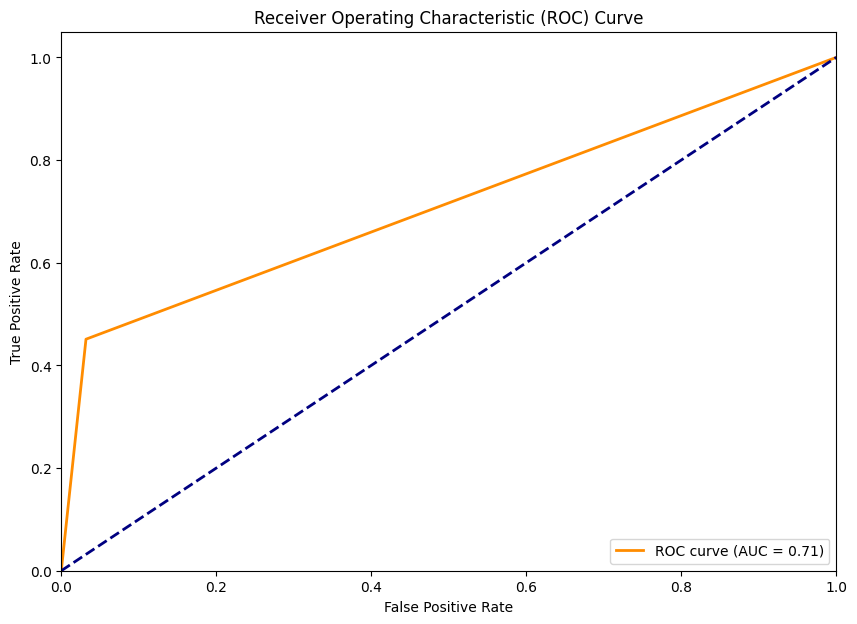

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [49]:
best_model.predict_proba(normalised_X_test)

array([[0.83272934, 0.16727068],
       [0.8272491 , 0.17275088],
       [0.9717367 , 0.02826327],
       ...,
       [0.62844056, 0.37155944],
       [0.7698484 , 0.23015161],
       [0.9779522 , 0.02204782]], dtype=float32)

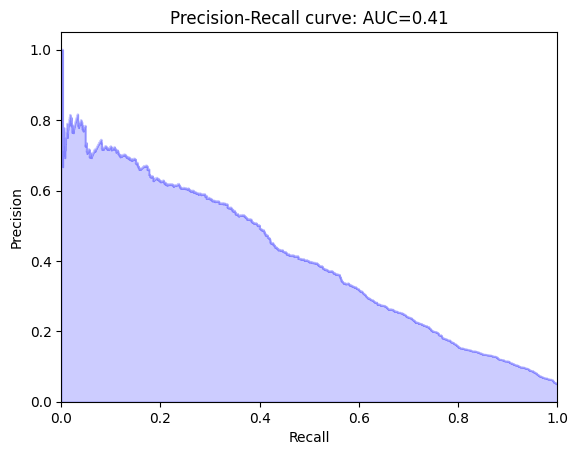

In [57]:
# Get predicted probabilities for the positive class (class 1)
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_prob = best_model.predict_proba(normalised_X_test)[:, 1]

# Calculate PR AUC
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plot Precision-Recall curve (optional)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(pr_auc))
plt.show()
